In [1]:
%matplotlib inline


============================
Underfitting vs. Overfitting
============================

This example demonstrates the problems of underfitting and overfitting and
how we can use linear regression with polynomial features to approximate
nonlinear functions. The plot shows the function that we want to approximate,
which is a part of the cosine function. In addition, the samples from the
real function and the approximations of different models are displayed. The
models have polynomial features of different degrees. We can see that a
linear function (polynomial with degree 1) is not sufficient to fit the
training samples. This is called **underfitting**. A polynomial of degree 4
approximates the true function almost perfectly. However, for higher degrees
the model will **overfit** the training data, i.e. it learns the noise of the
training data.
We evaluate quantitatively **overfitting** / **underfitting** by using
cross-validation. We calculate the mean squared error (MSE) on the validation
set, the higher, the less likely the model generalizes correctly from the
training data.



Automatically created module for IPython interactive environment


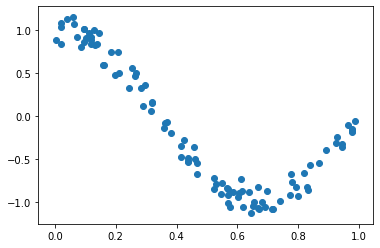

In [114]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 100
degrees = [2,5,15,50]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.scatter(X,y)

In [95]:
lr=LinearRegression()
lr.fit(X.reshape(-1,1),y)
prediction = lr.predict(X.reshape(-1,1))
#X.reshape(-1,1)
print(lr.score(X.reshape(-1,1),y))
print(metrics.mean_squared_error(prediction,y))

0.6316508187494854
0.2036613172944563


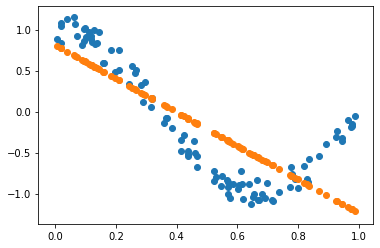

In [96]:
plt.scatter(X,y)
plt.scatter(X,prediction)

In [97]:
np.var(prediction)

0.3492415467842502

In [119]:
import statsmodels.api as sm
X_sm = sm.add_constant(X)
print(X.shape)

model = sm.OLS(y, X_sm)
model = model.fit()
predictions = model.predict(X_sm)
model.summary()

model.rsquared_adj

(100,)


0.627892153634684

In [120]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     168.1
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           5.61e-23
Time:                        09:54:52   Log-Likelihood:                -62.329
No. Observations:                 100   AIC:                             128.7
Df Residuals:                      98   BIC:                             133.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8126      0.088      9.280      0.000       0.639       0.986
x1            -2.0498      0.158    -12.963      0.000      -2.364      -1.736
==============================================================================
Omnibus:                        5.471   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                5.482
Skew:                           0.537   Prob(JB):                       0.0645
Kurtosis:                       2.598   Cond. No.                         4.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
poly = PolynomialFeatures(2,include_bias=False)
X_poly_2 = poly.fit_transform(X.reshape(-1,1))

In [122]:
X_poly_2.shape

(100, 2)

In [130]:
X_poly_2[:3,:]

array([[4.69547619e-03, 2.20474967e-05],
       [1.87898004e-02, 3.53056600e-04],
       [2.01075462e-02, 4.04313414e-04]])

In [124]:
lr.fit(X_poly_2,y)
prediction = lr.predict(X_poly_2)
lr.score(X_poly_2,y)
print(lr.score(X_poly_2,y))
print(metrics.mean_squared_error(prediction,y))

0.916790435041179
0.04600680678447535


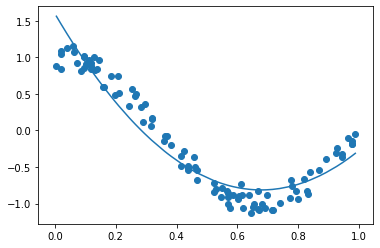

In [103]:
plt.scatter(X,y)
plt.plot(X,prediction)

Degree of polynomial 5
(100, 5)
Rsquare 0.9831886985769103
MSE 0.00929501670571674
Degree of polynomial 15
(100, 15)
Rsquare 0.9843092598556654
MSE 0.00867545516531734
Degree of polynomial 30
(100, 30)
Rsquare 0.9861555156286324
MSE 0.0076546550606220575


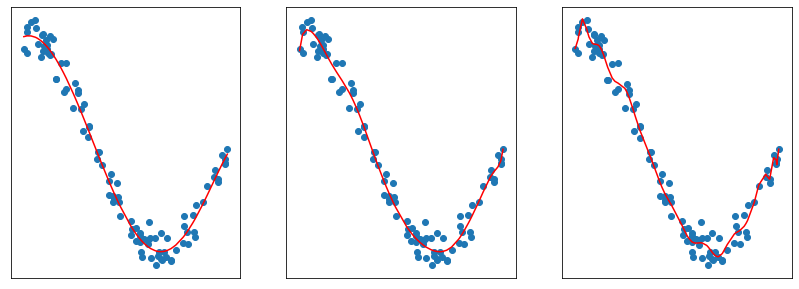

In [131]:
plt.figure(figsize=(14, 5))
degrees =[5,15,30]
for i in range(len(degrees)):
    print("Degree of polynomial", degrees[i])
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    poly = PolynomialFeatures(degrees[i],include_bias=False)
    X_poly = poly.fit_transform(X.reshape(-1,1))
    print(X_poly.shape)
    
    lr.fit(X_poly,y)
    prediction = lr.predict(X_poly)
    print("Rsquare",lr.score(X_poly,y))
    print("MSE",metrics.mean_squared_error(prediction,y))
    
    plt.scatter(X,y)
    plt.plot(X,prediction,color='r')
    
    
plt.show()